In [1]:
# 1) Import pandas and read in the banklist.csv file into a dataframe called
# banks.

import pandas as pd

df = pd.read_csv("/content/banklist.csv")
df

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [2]:
# 2) Show the head of the dataframe
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [3]:
# 3) What are the column names?
df.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [5]:
# 4) How many States (ST) are represented in this data set?
df['ST'].nunique()

44

In [6]:
# 5) Get a list or array of all the states in the data set.

array_states=list( df['ST'].unique())
array_states

['IL',
 'WI',
 'LA',
 'UT',
 'NJ',
 'AR',
 'GA',
 'PA',
 'TN',
 'WA',
 'CO',
 'PR',
 'FL',
 'MN',
 'CA',
 'MD',
 'OK',
 'OH',
 'SC',
 'VA',
 'ID',
 'TX',
 'CT',
 'AZ',
 'NV',
 'NC',
 'KY',
 'MO',
 'KS',
 'AL',
 'MI',
 'IN',
 'IA',
 'NE',
 'MS',
 'NM',
 'OR',
 'NY',
 'MA',
 'SD',
 'WY',
 'WV',
 'NH',
 'HI']

In [7]:
# 6) What are the top 5 states with the most failed banks?
top_states = df['ST'].value_counts().head(5)
print(top_states)

ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


In [8]:
# 7) What are the top 5 acquiring institutions?
top_acquirers = df['Acquiring Institution'].value_counts().head(5)
print(top_acquirers)


Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


In [9]:
# 8) How many banks has the State Bank of Texas acquired? How many of
# them were actually in Texas?

state_bank_acquisitions = df[df['Acquiring Institution'] == 'State Bank of Texas']

# print(state_bank_acquisitions)
print("banks that the State Bank of Texas acquired:",len(state_bank_acquisitions))

texas_acquisitions = state_bank_acquisitions[state_bank_acquisitions['ST'] == 'TX']
print("banks that were actually in Texas:",len(texas_acquisitions))


banks that the State Bank of Texas acquired: 3
banks that were actually in Texas: 1


In [10]:
# 9) What is the most common city in California for a bank to fail in?

california = df[df["ST"]=="CA"]
most_common_city = california['City'].value_counts().index[0]
print("Most common city in California for a bank to fail in:", most_common_city)

Most common city in California for a bank to fail in: Los Angeles


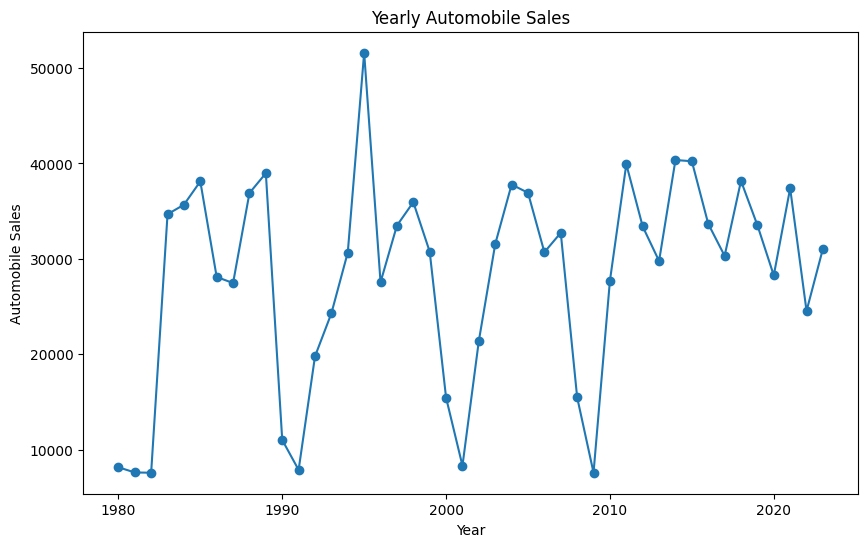

In [11]:
# Q 1: Develop a Line chart using the functionality of pandas to show how
# automobile sales fluctuate from year to year.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/historical_automobile_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])

yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()
# print(yearly_sales)
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-')
plt.title('Yearly Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.show()

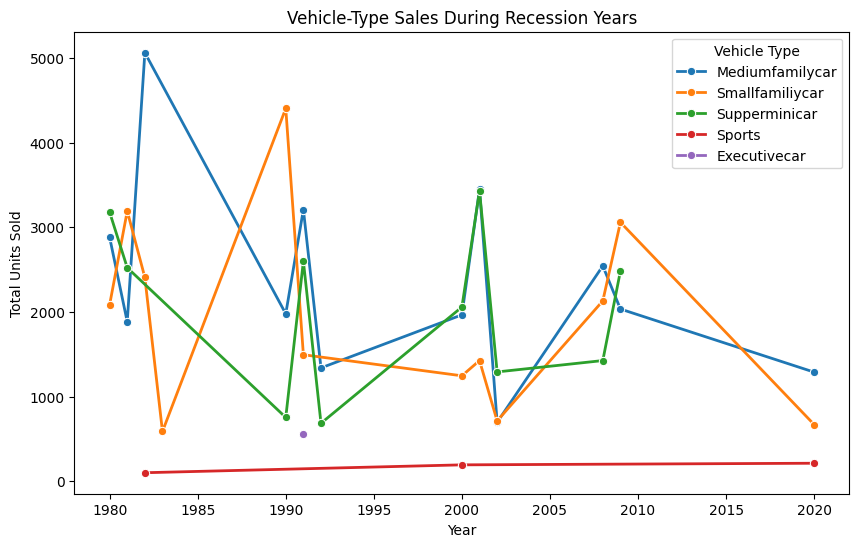

In [12]:
# Q 2: Plot different lines for categories of vehicle type and analyze the trend
# to answer the question Is there a noticeable difference in sales trends
# between different vehicle types during recession periods?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

recess = df[df["Recession"] == 1]
yearly = recess.groupby(["Year", "Vehicle_Type"])["Automobile_Sales"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly,
             x="Year", y="Automobile_Sales",
             hue="Vehicle_Type", marker="o", linewidth=2)

plt.title("Vehicle-Type Sales During Recession Years")
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.legend(title="Vehicle Type")
plt.show()
# yearly

In [13]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,1980-02-29,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,1980-03-31,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,1980-04-30,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,1980-05-31,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2023-08-31,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,2023-09-30,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,2023-10-31,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,2023-11-30,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


Text(0.5, 1.0, 'Vehicle-Type Sales During Recession Years')

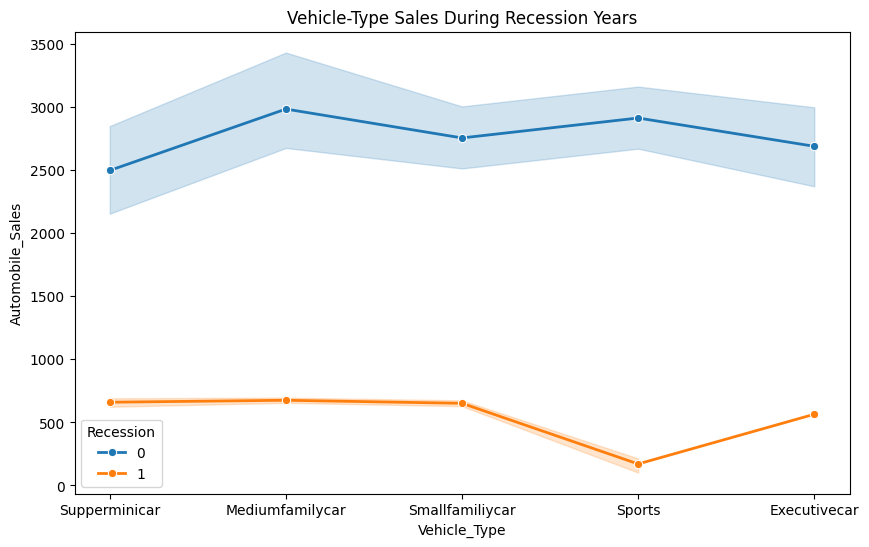

In [18]:
# Q 3: Use the functionality of Seaborn Library to create a visualization to compare
# the sales trend per vehicle type for a recession period with a non- recession
# period.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df,
             x="Vehicle_Type", y="Automobile_Sales",hue="Recession", marker="o", linewidth=2)

plt.title("Vehicle-Type Sales During Recession Years")





Text(0.5, 1.0, 'Vehicle-Type Sales During Recession Years')

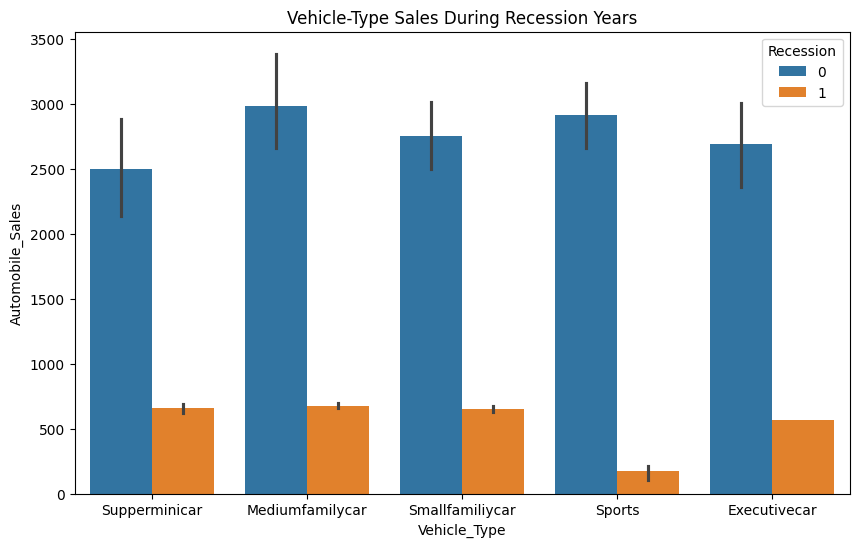

In [19]:
# Q 4: Now you want to compare the sales of different vehicle types
# during a recession and a non-recession period


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df,
             x="Vehicle_Type", y="Automobile_Sales",hue="Recession", linewidth=2)

plt.title("Vehicle-Type Sales During Recession Years")